In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('bank.csv', delimiter=';')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [50]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [51]:
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

#Analysis of data

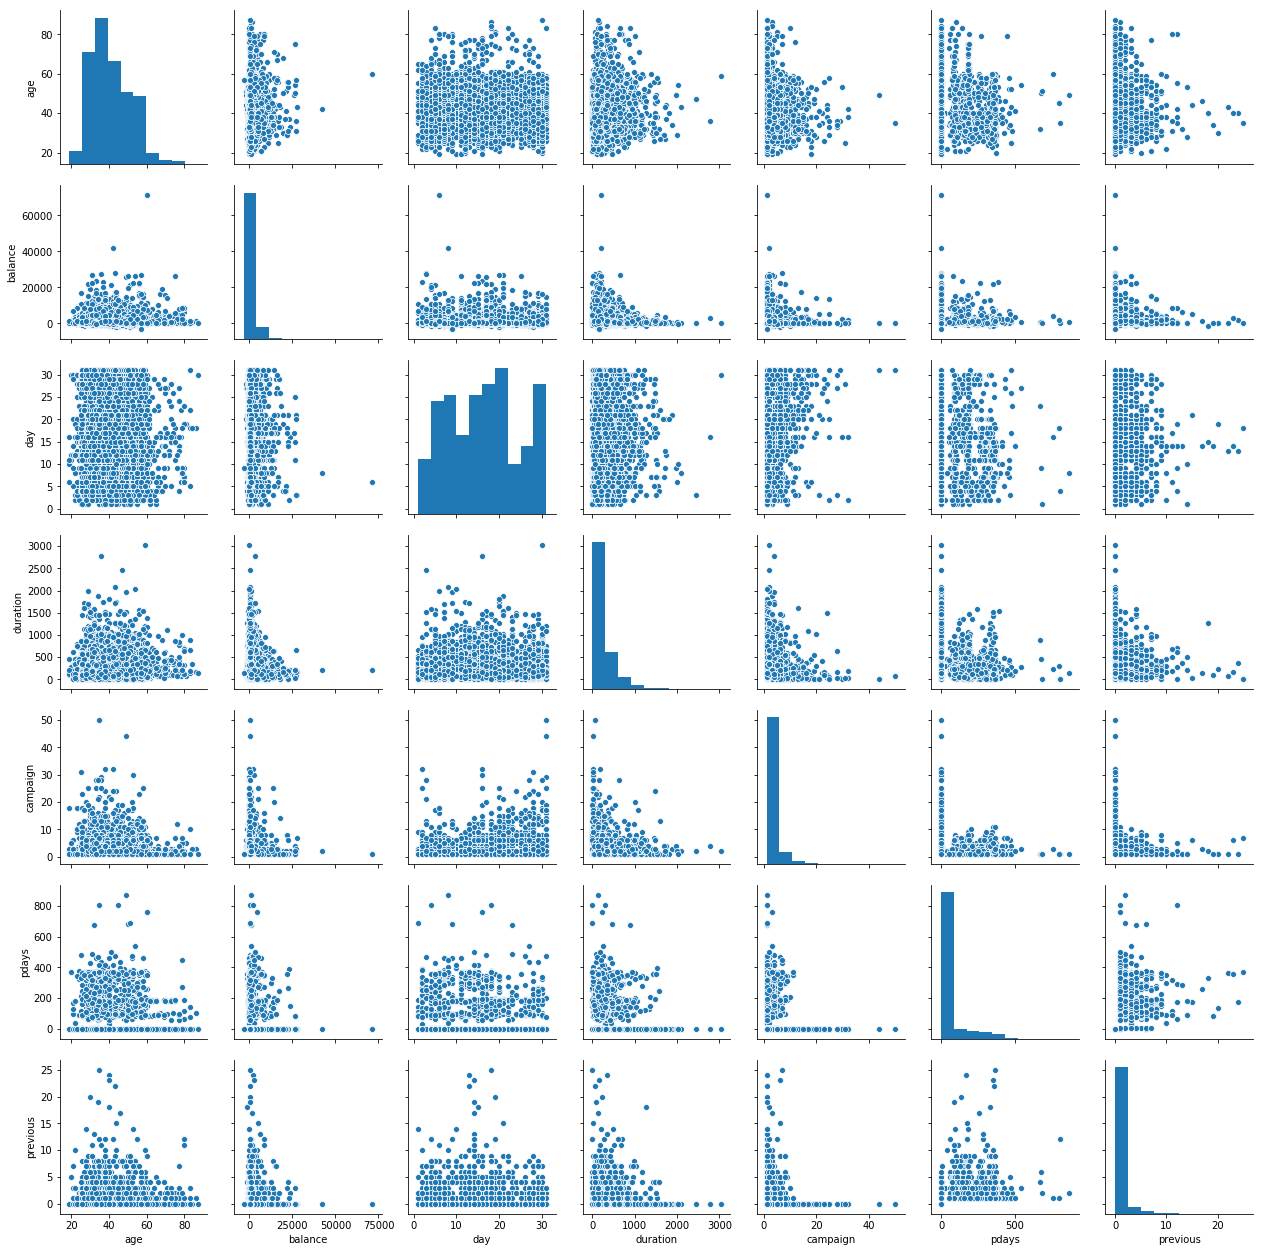

In [10]:
sns.pairplot(data)

In [52]:
yes = pd.get_dummies(data['y'],drop_first=True)

In [115]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [118]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [97]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [98]:
data['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

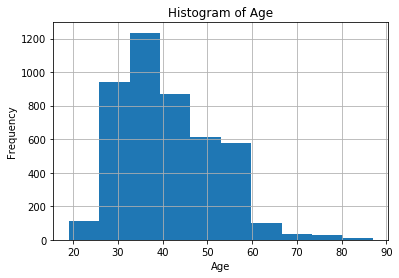

In [20]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

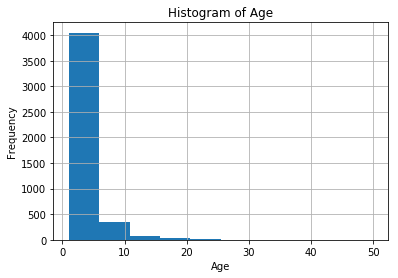

In [23]:
data.campaign.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [56]:
data.groupby('y').mean()

age      balance        day    duration  campaign      pdays  \
y                                                                         
no   40.998000  1403.211750  15.948750  226.347500  2.862250  36.006000   
yes  42.491363  1571.955854  15.658349  552.742802  2.266795  68.639155   

     previous  
y              
no   0.471250  
yes  1.090211

In [57]:
y = pd.DataFrame(yes)
data = pd.concat([data,yes],axis=1)

In [58]:
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  yes  
0  cellular   19   oct        79         1     -1         0  unknown  no    0  
1  cellular   11   may       220         1    339         4  failure  no    0  
2  cellular   16   apr       185         1    330         1  failure  no    0  
3   unknown    3   jun       199         4     -1         0  unknown  no    0  
4   unknown    5   may       226         1     -1         0  unknown  no    0

In [82]:
count_y= len(data[data['yes']==1])
count_n= len(data[data['yes']==0])

In [90]:
per_y = count_y*100/(count_n+count_y)

In [91]:
per_n = count_n*100/(count_n+count_y)

In [92]:
print 'Total no.of people subscribe: ', per_y
print 'Total no.of people not subscribed: ', per_n

Total no.of people subscribe:  11
Total no.of people not subscribed:  88


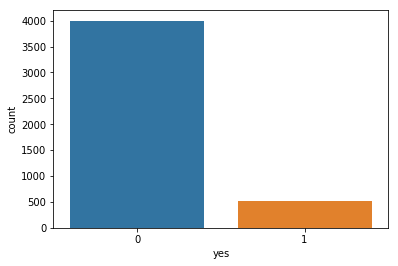

In [93]:
sns.countplot(data['yes'])

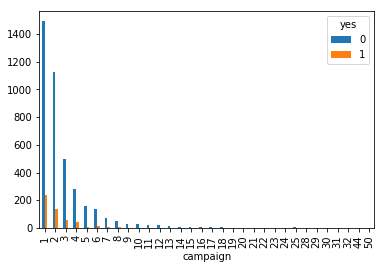

In [96]:
pd.crosstab(data.campaign,data.yes).plot(kind='bar')

In [119]:
data['job']=np.where(data['job'] =='unemployed', 'less', data['job'])
data['job']=np.where(data['job'] =='unknown', 'less', data['job'])
data['job']=np.where(data['job'] =='student', 'less', data['job'])
data['job']=np.where(data['job'] =='housemaid', 'less', data['job'])
data['job']=np.where(data['job'] =='admin.', 'medium', data['job'])
data['job']=np.where(data['job'] =='management', 'medium', data['job'])
data['job']=np.where(data['job'] =='blue-collar', 'medium', data['job'])
data['job']=np.where(data['job'] =='services', 'medium', data['job'])
data['job']=np.where(data['job'] =='entrepreneur', 'high', data['job'])
data['job']=np.where(data['job'] =='technician', 'high', data['job'])
data['job']=np.where(data['job'] =='self-employed', 'high', data['job'])
data['job']=np.where(data['job'] =='retired', 'high', data['job'])
data['poutcome']=np.where(data['poutcome'] =='unknown', 'other', data['poutcome'])


In [117]:
data['job'].unique()

array(['less', 'medium', 'high'], dtype=object)

In [120]:
data['poutcome'].unique()

array(['other', 'failure', 'success'], dtype=object)

In [121]:
data.head()

age     job  marital  education default  balance housing loan   contact  \
0   30    less  married    primary      no     1787      no   no  cellular   
1   33  medium  married  secondary      no     4789     yes  yes  cellular   
2   35  medium   single   tertiary      no     1350     yes   no  cellular   
3   30  medium  married   tertiary      no     1476     yes  yes   unknown   
4   59  medium  married  secondary      no        0     yes   no   unknown   

   day month  duration  campaign  pdays  previous poutcome   y  yes  
0   19   oct        79         1     -1         0    other  no    0  
1   11   may       220         1    339         4  failure  no    0  
2   16   apr       185         1    330         1  failure  no    0  
3    3   jun       199         4     -1         0    other  no    0  
4    5   may       226         1     -1         0    other  no    0

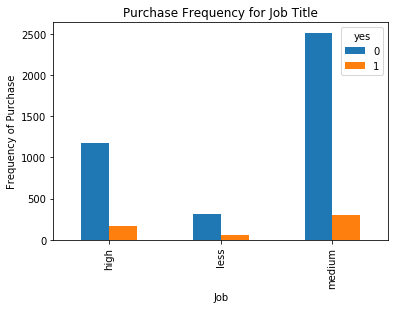

In [122]:
pd.crosstab(data.job,data.yes).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

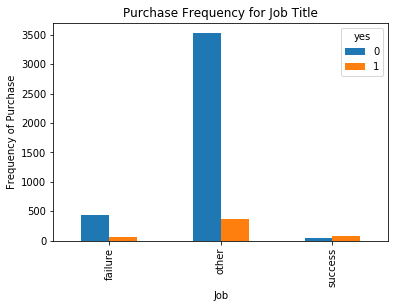

In [123]:
pd.crosstab(data.poutcome,data.yes).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [124]:
cat_vars=['job','marital','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

cat_vars=['job','marital','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.columns.values

array(['age', 'education', 'balance', 'day', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'yes', 'job_high', 'job_less',
       'job_medium', 'marital_divorced', 'marital_married',
       'marital_single', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype=object)

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

x = data.drop('yes',axis=1)
y = data['yes']

In [143]:
data.drop(['job','marital','default','housing','loan','contact','month','poutcome','education','y'],axis=1,inplace=True)

In [146]:
data.head()

age  balance  day  duration  campaign  pdays  previous  yes  job_high  \
0   30     1787   19        79         1     -1         0    0         0   
1   33     4789   11       220         1    339         4    0         0   
2   35     1350   16       185         1    330         1    0         0   
3   30     1476    3       199         4     -1         0    0         0   
4   59        0    5       226         1     -1         0    0         0   

   job_less        ...         month_jul  month_jun  month_mar  month_may  \
0         1        ...                 0          0          0          0   
1         0        ...                 0          0          0          1   
2         0        ...                 0          0          0          0   
3         0        ...                 0          1          0          0   
4         0        ...                 0          0          0          1   

   month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0          0          1          0                 0               1   
1          0          0          0                 1               0   
2          0          0          0                 1               0   
3          0          0          0                 0               1   
4          0          0          0                 0               1   

   poutcome_success  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 38 columns]

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [151]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1158   32]
 [ 109   58]]
